# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Benedicta Sabdaningtyas Pratita Pratanjana]
- **Email:** [benedicta.pratanjana@gmail.com]
- **ID Dicoding:** [benedicta_pratanjana]

## Menentukan Pertanyaan Bisnis

- Bagaimanakah tren rental sepeda setiap harinya? Apakah ditemukan peningkatan dibandingkan tahun sebelumnya?
- Bagaimanakah tren rental sepeda pada hari kerja dibandingkan dengan akhir pekan? Apakah pada hari kerja dengan akhir pekan memiliki perbedaan pola jam penggunaan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

Memuat Tabel Jam/Waktu

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Memuat Tabel Hari

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat 17379 entries dengan total columns sebanyak 17 tanpa null

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat 731 entries dengan total columns sebanyak 16 tanpa null

### Cleaning Data

In [8]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print("Informasi Dataframe Hour.csv setelah cleaning:")
hour_df.info()

Informasi Dataframe Hour.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-n

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print("Informasi Dataframe Day.csv setelah cleaning:")
day_df.info()

Informasi Dataframe Day.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    

## Exploratory Data Analysis (EDA)

### 1. Bagaimanakah tren rental sepeda setiap harinya? Apakah ditemukan peningkatan dibandingkan tahun sebelumnya?

In [14]:
summary_stats = day_df.describe(include='all', datetime_is_numeric=True)
print(summary_stats)

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [15]:
monthly_avg_usage = day_df.groupby(['yr', 'mnth']).agg({'cnt': 'mean'}).reset_index()
print(monthly_avg_usage)

    yr  mnth          cnt
0    0     1  1231.903226
1    0     2  1721.964286
2    0     3  2065.967742
3    0     4  3162.333333
4    0     5  4381.322581
5    0     6  4783.733333
6    0     7  4559.387097
7    0     8  4409.387097
8    0     9  4247.266667
9    0    10  3984.225806
10   0    11  3405.566667
11   0    12  2816.870968
12   1     1  3120.774194
13   1     2  3556.448276
14   1     3  5318.548387
15   1     4  5807.466667
16   1     5  6318.225806
17   1     6  6761.000000
18   1     7  6567.967742
19   1     8  6919.451613
20   1     9  7285.766667
21   1    10  6414.225806
22   1    11  5088.800000
23   1    12  3990.741935


### 2. Bagaimanakah tren rental sepeda pada hari kerja dibandingkan dengan akhir pekan? Apakah pada hari kerja dengan akhir pekan memiliki perbedaan pola jam penggunaan?

In [17]:
summary_stats = hour_df[['hr', 'workingday', 'cnt']].describe()
print(summary_stats)

                 hr    workingday           cnt
count  17379.000000  17379.000000  17379.000000
mean      11.546752      0.682721    189.463088
std        6.914405      0.465431    181.387599
min        0.000000      0.000000      1.000000
25%        6.000000      0.000000     40.000000
50%       12.000000      1.000000    142.000000
75%       18.000000      1.000000    281.000000
max       23.000000      1.000000    977.000000


In [19]:
hour_df['is_weekend'] = hour_df['dteday'].dt.dayofweek.isin([5, 6])
hourly_trend = hour_df.groupby(['hr', 'is_weekend']).agg({'cnt': 'mean'}).reset_index()
print(hourly_trend)

    hr  is_weekend         cnt
0    0       False   37.626692
1    0        True   94.148325
2    1       False   17.464078
3    1        True   72.583732
4    2       False    9.377953
5    2        True   55.980676
6    3       False    5.188525
7    3        True   26.995215
8    4       False    5.446939
9    4        True    8.497585
10   5       False   24.331395
11   5        True    8.487562
12   6       False   99.485493
13   6        True   17.778846
14   7       False  282.145068
15   7        True   39.533333
16   8       False  464.557060
17   8        True   99.166667
18   9       False  238.661509
19   9        True  171.666667
20  10       False  138.133462
21  10        True  261.152381
22  11       False  161.897485
23  11        True  321.995238
24  12       False  204.320463
25  12        True  374.171429
26  13       False  202.479769
27  13        True  380.152381
28  14       False  187.728324
29  14        True  372.480952
30  15       False  203.913295
31  15  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah tren rental sepeda setiap harinya? Apakah ditemukan peningkatan dibandingkan tahun sebelumnya?

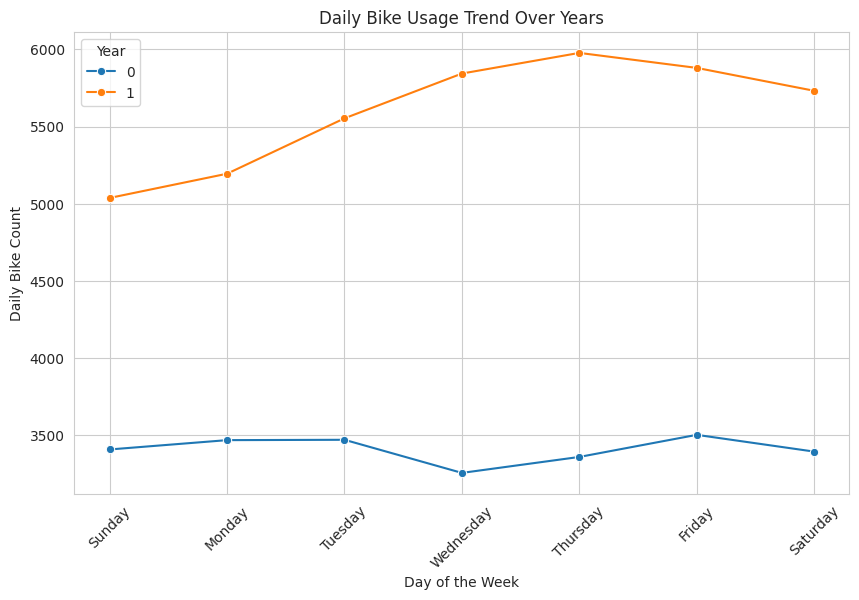

In [26]:
def load_data():
    day_df = pd.read_csv('day.csv')  # Adjust path as necessary
    hour_df = pd.read_csv('hour.csv')  # Adjust path as necessary
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
    return day_df, hour_df
day_df, hour_df = load_data()  # Assigning both dataframes

# Filter Date Range
start_date = day_df['dteday'].min() # Set the start date
end_date = day_df['dteday'].max()   # Set the end date
filtered_day_df = day_df[(day_df['dteday'] >= start_date) & (day_df['dteday'] <= end_date)]

# Extract day of the week and map it to start from Sunday
filtered_day_df['day_of_week'] = filtered_day_df['dteday'].dt.dayofweek
filtered_day_df['day_of_week'] = (filtered_day_df['day_of_week'] + 1) % 7  # Start from Sunday

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=filtered_day_df, x='day_of_week', y='cnt', hue='yr', marker="o", errorbar=None)
plt.xlabel('Day of the Week')
plt.ylabel('Daily Bike Count')
plt.title('Daily Bike Usage Trend Over Years')
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
plt.legend(title='Year')
plt.show()

### Pertanyaan 2: Bagaimanakah tren rental sepeda pada hari kerja dibandingkan dengan akhir pekan? Apakah pada hari kerja dengan akhir pekan memiliki perbedaan pola jam penggunaan?

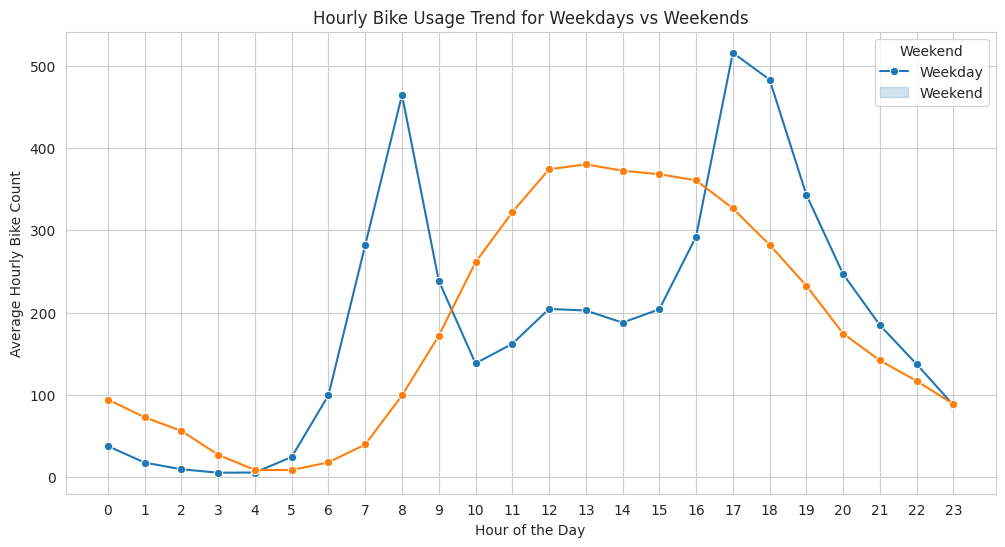

In [23]:
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek
hour_df['is_weekend'] = hour_df['day_of_week'].isin([5, 6])  # Saturday and Sunday are considered weekends

# Visualization: Hourly Bike Usage Trend for Weekdays vs Weekends
plt.figure(figsize=(12, 6))

# Create a DataFrame for hourly trend
hourly_trend = hour_df.groupby(['hr', 'is_weekend']).agg({'cnt': 'mean'}).reset_index()

# Plot the line graph
sns.lineplot(data=hourly_trend, x='hr', y='cnt', hue='is_weekend', marker="o")
plt.title('Hourly Bike Usage Trend for Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Hourly Bike Count')
plt.xticks(np.arange(0, 24))
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Plot menunjukkan bahwa terdapat peningkatan jumlah penyewa pada tahun selanjutnya dibanding dengan tahun sebelumnya. Pada tahun pertama, jumlah pengguna hanya mencapai 3500, sementara tahun selanjutnya hampir 6000. Pada tahun pertama, hari Jumat memiliki jumlah rerata terbanyak. Sementara tahun selanjutnya jumlah tertinggi justru ada pada hari Kamis.
- Conclution pertanyaan 2 :
Plot menunjukkan bahwa terdapat pola peningkatan penggunaan sepeda pada pagi dan sore hari, dapat diasumsikan sebagai jam berangkat dan pulang kerja pada weekdays. Sementara pada weekends, penggunaan sepeda cenderung stabil mulai dari siang hingga sore hari, menunjukkan penggunaan cenderung bersifat rekreatif.


# Clustering

Clustering Analysis based on Windspeed


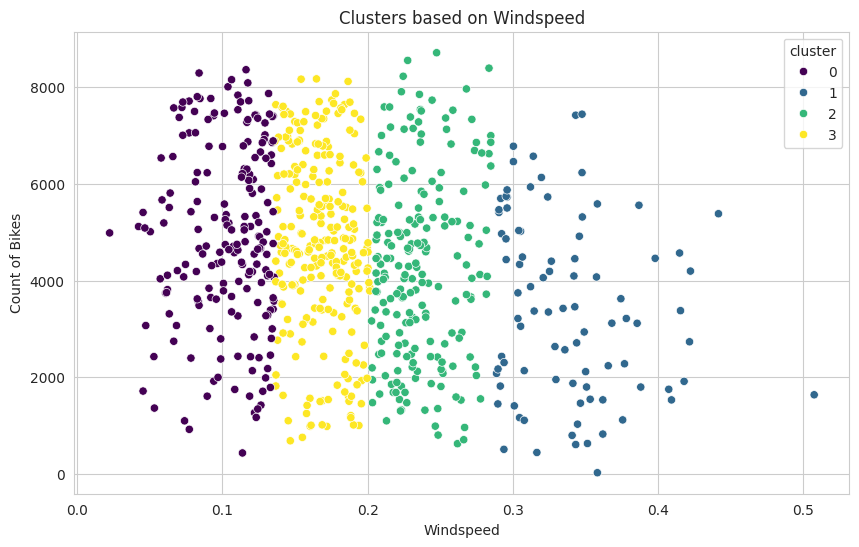

In [28]:
# Filter Date Range
start_date = day_df['dteday'].min()
end_date = day_df['dteday'].max()
filtered_day_df = day_df[(day_df['dteday'] >= start_date) & (day_df['dteday'] <= end_date)]

# Clustering Analysis based on 'windspeed'
print("Clustering Analysis based on Windspeed")

# Select number of clusters
number_of_clusters = 4  # You can adjust this manually

# Select features for clustering
features = ['windspeed']  # Using only windspeed for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_day_df[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=number_of_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)
filtered_day_df['cluster'] = clusters

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_day_df['windspeed'], y=filtered_day_df['cnt'], hue=filtered_day_df['cluster'], palette='viridis')
plt.xlabel('Windspeed')
plt.ylabel('Count of Bikes')
plt.title('Clusters based on Windspeed')
plt.show()

Dengan menggunakan algoritma K-Means Clustering, kita dapat mengelompokkan hari-hari dalam setahun berdasarkan pola penggunaan sepeda. Dalam contoh ini, kita memilih untuk menggunakan 4 kelompok (diberi label 0, 1, 2, dan 3). Visualisasi scatterplot menunjukkan bahwa pola penggunaan sepeda pada hari-hari tertentu dapat dikelompokkan ke dalam kelompok-kelompok berbeda berdasarkan kecepatan angin dan jumlah sepeda yang dipinjam. Kelompok-kelompok ini membantu dalam mengidentifikasi pola penggunaan sepeda yang serupa, yang dapat memberikan wawasan tentang preferensi penggunaan sepeda dalam berbagai kondisi. Analisis karakteristik dari masing-masing kelompok menunjukkan bahwa setiap kelompok memiliki profil uniknya sendiri, memberikan pemahaman lebih mendalam tentang faktor-faktor yang memengaruhi pola penggunaan sepeda pada setiap kelompok.

In [30]:
# Group the data by cluster
cluster_stats = filtered_day_df.groupby('cluster')[['windspeed', 'cnt']].describe()

# Print the statistics and characteristics for each cluster
for cluster_id, cluster_data in cluster_stats.iterrows():
    print(f"Cluster {cluster_id}:")
    print(cluster_data)
    print("\n")

Cluster 0:
windspeed  count     190.000000
           mean        0.103375
           std         0.025472
           min         0.022392
           25%         0.083959
           50%         0.110700
           75%         0.124379
           max         0.135583
cnt        count     190.000000
           mean     4916.742105
           std      1896.434681
           min       431.000000
           25%      3643.000000
           50%      4799.000000
           75%      6542.000000
           max      8362.000000
Name: 0, dtype: float64


Cluster 1:
windspeed  count      88.000000
           mean        0.338646
           std         0.042586
           min         0.288783
           25%         0.303955
           50%         0.335198
           75%         0.358197
           max         0.507463
cnt        count      88.000000
           mean     3447.863636
           std      1857.810751
           min        22.000000
           25%      1857.750000
           50%      3358

In [34]:
#Merge Two Dataframes Day and Hour
merged_df = pd.merge(day_df, hour_df, on='dteday', how='inner')
print(merged_df)
merged_df.info()

       instant_x     dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0              1 2011-01-01         1     0       1          0          6   
1              1 2011-01-01         1     0       1          0          6   
2              1 2011-01-01         1     0       1          0          6   
3              1 2011-01-01         1     0       1          0          6   
4              1 2011-01-01         1     0       1          0          6   
...          ...        ...       ...   ...     ...        ...        ...   
17374        731 2012-12-31         1     1      12          0          1   
17375        731 2012-12-31         1     1      12          0          1   
17376        731 2012-12-31         1     1      12          0          1   
17377        731 2012-12-31         1     1      12          0          1   
17378        731 2012-12-31         1     1      12          0          1   

       workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  